In [253]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
intake = pd.read_csv('aac_intakes.csv')
intakes_outcomes = pd.read_csv('aac_intakes_outcomes.csv')
outcomes = pd.read_csv('aac_outcomes.csv')

1) Is there an area where more pets are found?

In [254]:
intakes_outcomes.head()

,age_upon_outcome,animal_id_outcome,date_of_birth,outcome_subtype,outcome_type,sex_upon_outcome,age_upon_outcome_(days),age_upon_outcome_(years),age_upon_outcome_age_group,outcome_datetime,...,age_upon_intake_age_group,intake_datetime,intake_month,intake_year,intake_monthyear,intake_weekday,intake_hour,intake_number,time_in_shelter,time_in_shelter_days
0,10 years,A006100,2007-07-09 00:00:00,NaN,Return to Owner,Neutered Male,3650,10.0,"(7.5, 10.0]",2017-12-07 14:07:00,...,"(7.5, 10.0]",2017-12-07 00:00:00,12,2017,2017-12,Thursday,14,1.0,0 days 14:07:00.000000000,0.588194
1,7 years,A006100,2007-07-09 00:00:00,NaN,Return to Owner,Neutered Male,2555,7.0,"(5.0, 7.5]",2014-12-20 16:35:00,...,"(5.0, 7.5]",2014-12-19 10:21:00,12,2014,2014-12,Friday,10,2.0,1 days 06:14:00.000000000,1.259722
2,6 years,A006100,2007-07-09 00:00:00,NaN,Return to Owner,Neutered Male,2190,6.0,"(5.0, 7.5]",2014-03-08 17:10:00,...,"(5.0, 7.5]",2014-03-07 14:26:00,3,2014,2014-03,Friday,14,3.0,1 days 02:44:00.000000000,1.113889
3,10 years,A047759,2004-04-02 00:00:00,Partner,Transfer,Neutered Male,3650,10.0,"(7.5, 10.0]",2014-04-07 15:12:00,...,"(7.5, 10.0]",2014-04-02 15:55:00,4,2014,2014-04,Wednesday,15,1.0,4 days 23:17:00.000000000,4.970139
4,16 years,A134067,1997-10-16 00:00:00,NaN,Return to Owner,Neutered Male,5840,16.0,"(15.0, 17.5]",2013-11-16 11:54:00,...,"(15.0, 17.5]",2013-11-16 09:02:00,11,2013,2013-11,Saturday,9,1.0,0 days 02:52:00.000000000,0.119444


In [255]:
intake.head()

,age_upon_intake,animal_id,animal_type,breed,color,datetime,datetime2,found_location,intake_condition,intake_type,name,sex_upon_intake
0,8 years,A706918,Dog,English Springer Spaniel,White/Liver,2015-07-05T12:59:00.000,2015-07-05T12:59:00.000,9409 Bluegrass Dr in Austin (TX),Normal,Stray,Belle,Spayed Female
1,11 months,A724273,Dog,Basenji Mix,Sable/White,2016-04-14T18:43:00.000,2016-04-14T18:43:00.000,2818 Palomino Trail in Austin (TX),Normal,Stray,Runster,Intact Male
2,4 weeks,A665644,Cat,Domestic Shorthair Mix,Calico,2013-10-21T07:59:00.000,2013-10-21T07:59:00.000,Austin (TX),Sick,Stray,NaN,Intact Female
3,4 years,A682524,Dog,Doberman Pinsch/Australian Cattle Dog,Tan/Gray,2014-06-29T10:38:00.000,2014-06-29T10:38:00.000,800 Grove Blvd in Austin (TX),Normal,Stray,Rio,Neutered Male
4,2 years,A743852,Dog,Labrador Retriever Mix,Chocolate,2017-02-18T12:46:00.000,2017-02-18T12:46:00.000,Austin (TX),Normal,Owner Surrender,Odin,Neutered Male


In [256]:
all_intakes = intake.merge(intakes_outcomes, left_on=['animal_id'], right_on=['animal_id_intake'])
all_intakes

,age_upon_intake_x,animal_id,animal_type_x,breed_x,color_x,datetime,datetime2,found_location_x,intake_condition_x,intake_type_x,...,age_upon_intake_age_group,intake_datetime,intake_month,intake_year,intake_monthyear,intake_weekday,intake_hour,intake_number,time_in_shelter,time_in_shelter_days
0,8 years,A706918,Dog,English Springer Spaniel,White/Liver,2015-07-05T12:59:00.000,2015-07-05T12:59:00.000,9409 Bluegrass Dr in Austin (TX),Normal,Stray,...,"(7.5, 10.0]",2015-07-05 12:59:00,7,2015,2015-07,Sunday,12,1.0,0 days 02:14:00.000000000,0.093056
1,11 months,A724273,Dog,Basenji Mix,Sable/White,2016-04-14T18:43:00.000,2016-04-14T18:43:00.000,2818 Palomino Trail in Austin (TX),Normal,Stray,...,"(-0.025, 2.5]",2016-04-14 18:43:00,4,2016,2016-04,Thursday,18,1.0,6 days 22:34:00.000000000,6.940278
2,4 weeks,A665644,Cat,Domestic Shorthair Mix,Calico,2013-10-21T07:59:00.000,2013-10-21T07:59:00.000,Austin (TX),Sick,Stray,...,"(-0.025, 2.5]",2013-10-21 07:59:00,10,2013,2013-10,Monday,7,1.0,0 days 03:40:00.000000000,0.152778
3,4 years,A682524,Dog,Doberman Pinsch/Australian Cattle Dog,Tan/Gray,2014-06-29T10:38:00.000,2014-06-29T10:38:00.000,800 Grove Blvd in Austin (TX),Normal,Stray,...,"(2.5, 5.0]",2014-06-29 10:38:00,6,2014,2014-06,Sunday,10,1.0,3 days 03:38:00.000000000,3.151389
4,2 years,A743852,Dog,Labrador Retriever Mix,Chocolate,2017-02-18T12:46:00.000,2017-02-18T12:46:00.000,Austin (TX),Normal,Owner Surrender,...,"(-0.025, 2.5]",2017-02-18 12:46:00,2,2017,2017-02,Saturday,12,1.0,3 days 04:58:00.000000000,3.206944
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100125,5 months,A763562,Dog,Chihuahua Shorthair Mix,Cream,2018-03-17T14:59:00.000,2018-03-17T14:59:00.000,Austin (TX),Normal,Owner Surrender,...,"(-0.025, 2.5]",2017-12-11 11:04:00,12,2017,2017-12,Monday,11,2.0,3 days 05:31:00.000000000,3.229861
100126,1 year,A769065,Other,Bat Mix,Brown,2018-03-29T17:19:00.000,2018-03-29T17:19:00.000,1122 Walton Ln in Austin (TX),Normal,Wildlife,...,"(-0.025, 2.5]",2018-03-29 17:19:00,3,2018,2018-03,Thursday,17,1.0,0 days 01:09:00.000000000,0.047917
100127,10 years,A769067,Dog,Boxer Mix,Brown Brindle,2018-03-29T18:20:00.000,2018-03-29T18:20:00.000,11216 Jollyville Rd 216 in Austin (TX),Aged,Stray,...,"(7.5, 10.0]",2018-03-29 18:20:00,3,2018,2018-03,Thursday,18,1.0,0 days 19:32:00.000000000,0.813889
100128,5 years,A768934,Dog,Dachshund Wirehair/Chihuahua Shorthair,Chocolate/White,2018-03-27T14:27:00.000,2018-03-27T14:27:00.000,603 West Johanna Street in Austin (TX),Normal,Stray,...,"(2.5, 5.0]",2018-03-27 14:27:00,3,2018,2018-03,Tuesday,14,1.0,5 days 22:34:00.000000000,5.940278


In [257]:
all_intakes['found_location_x'].unique()

array(['9409 Bluegrass Dr in Austin (TX)',
       '2818 Palomino Trail in Austin (TX)', 'Austin (TX)', ...,
       '1122 Walton Ln in Austin (TX)',
       '11216 Jollyville Rd 216 in Austin (TX)',
       '2519 Scarbrough Dr in Travis (TX)'], dtype=object)

In [258]:
#locations = intake['found_location'].unique()
#main_area = []
#max = []
#a = 0
#for lc in locations:
    #if len(max) < 5:
        #max.append(len(all_intakes.loc[all_intakes['found_location_x'] == lc,]))
        #main_area.append(lc)
    #elif len(max) == 5:
        #max.append(len(all_intakes.loc[all_intakes['found_location_x'] == lc,]))
        #main_area.append(lc)
        #a = max.index(min(max))
        #max.remove(min(max))
        #main_area.remove(main_area[a])
#print(f'The five areas where more pets are found are \033[1m{main_area}\033[1m')

QUESTION 02: What is the average number of pets found in a month in the year 2015? Are there months where there is a higher number of animals found?

In [259]:
intake['datetime'] = pd.to_datetime(intake['datetime'])
intake.dtypes

age_upon_intake             object
animal_id                   object
animal_type                 object
breed                       object
color                       object
datetime            datetime64[ns]
datetime2                   object
found_location              object
intake_condition            object
intake_type                 object
name                        object
sex_upon_intake             object
dtype: object

In [260]:
intake_15 = intake[intake['datetime'] >= datetime.datetime(2015,1,1)].sort_values(by=['datetime'], ascending=False)[38637:]
intake_15

,age_upon_intake,animal_id,animal_type,breed,color,datetime,datetime2,found_location,intake_condition,intake_type,name,sex_upon_intake
31988,1 year,A718503,Dog,Miniature Poodle Mix,White,2015-12-31 21:45:00,2015-12-31T21:45:00.000,Ih 35 & Tech Ridge in Austin (TX),Normal,Stray,*Johannes,Intact Male
51608,8 years,A718502,Dog,Pit Bull Mix,Brown Brindle/White,2015-12-31 16:05:00,2015-12-31T16:05:00.000,4802 Brook Creek in Austin (TX),Normal,Stray,Whiskey,Neutered Male
67752,1 year,A703506,Dog,Pit Bull Mix,Brown Brindle,2015-12-31 15:44:00,2015-12-31T15:44:00.000,Outside Jurisdiction,Normal,Owner Surrender,Nala,Spayed Female
70419,1 year,A718501,Dog,Australian Cattle Dog Mix,Black/White,2015-12-31 15:08:00,2015-12-31T15:08:00.000,Water Ave And S 1St St in Austin (TX),Normal,Stray,*Hank Cowdog,Intact Male
10735,1 year,A718498,Dog,Labrador Retriever Mix,Black,2015-12-31 15:04:00,2015-12-31T15:04:00.000,Austin (TX),Normal,Owner Surrender,Snoop Dog,Intact Male
...,...,...,...,...,...,...,...,...,...,...,...,...
1255,3 years,A694638,Dog,Miniature Poodle Mix,White,2015-01-01 12:07:00,2015-01-01T12:07:00.000,Brantley Bnd in Austin (TX),Normal,Stray,Ralphie,Intact Male
62211,6 years,A694637,Dog,German Shepherd,Black/Brown,2015-01-01 12:00:00,2015-01-01T12:00:00.000,7900 Thaxton in Austin (TX),Normal,Stray,*Cruiser,Intact Male
23223,5 years,A694631,Dog,Boxer Mix,Brown/White,2015-01-01 11:23:00,2015-01-01T11:23:00.000,Gattis School Rd & Red Bud Ln in Round Rock (TX),Normal,Stray,Night Wing,Neutered Male
20925,1 month,A694630,Dog,Pit Bull Mix,Brown/White,2015-01-01 11:18:00,2015-01-01T11:18:00.000,7201 Levander Loop in Austin (TX),Normal,Stray,*King Bacon,Intact Male


In [261]:
intake_january = intake_15[intake_15['datetime'] <= datetime.datetime(2015,2,1)]
intake_february = intake_15[intake_15['datetime'] < datetime.datetime(2015,3,1)]
intake_march = intake_15[intake_15['datetime'] < datetime.datetime(2015,4,1)]
intake_april = intake_15[intake_15['datetime'] < datetime.datetime(2015,5,1)]
intake_may = intake_15[intake_15['datetime'] < datetime.datetime(2015,6,1)]
intake_june = intake_15[intake_15['datetime'] < datetime.datetime(2015,7,1)]
intake_july = intake_15[intake_15['datetime'] < datetime.datetime(2015,8,1)]
intake_august = intake_15[intake_15['datetime'] < datetime.datetime(2015,9,1)]
intake_september = intake_15[intake_15['datetime'] < datetime.datetime(2015,10,1)]
intake_october = intake_15[intake_15['datetime'] < datetime.datetime(2015,11,1)]
intake_november = intake_15[intake_15['datetime'] < datetime.datetime(2015,12,1)]
intake_december = intake_15[intake_15['datetime'] > datetime.datetime(2015,12,1)]
lanimals_month = [len(intake_january),len(intake_february), len(intake_march), len(intake_april), len(intake_may),
                  len(intake_june), len(intake_july), len(intake_august), len(intake_september),
                  len(intake_october), len(intake_november), len(intake_december)]
kaniamls_month = {'January': lanimals_month[0], 'February': lanimals_month[1], 'March': lanimals_month[2],
                  'April': lanimals_month[3], 'May': lanimals_month[4], 'June': lanimals_month[5],
                  'July': lanimals_month[6], 'August': lanimals_month[7], 'September': lanimals_month[8],
                  'October':lanimals_month[9], 'November': lanimals_month[10], 'December':lanimals_month[11]}

ar = np.array(lanimals_month)
average = np.sum(ar)/len(ar)
average.round(3)

8538.083

QUESTION 03: What is the ratio of incoming pets vs. adopted pets?

In [262]:
incoming_pets = len(intake)
adopted_pets = len(outcomes)
ratio = incoming_pets/adopted_pets
ratio.__round__(3)

0.994

QUESTION 04: What is the distribution of the types of animals in the shelter?

In [263]:
intake

,age_upon_intake,animal_id,animal_type,breed,color,datetime,datetime2,found_location,intake_condition,intake_type,name,sex_upon_intake
0,8 years,A706918,Dog,English Springer Spaniel,White/Liver,2015-07-05 12:59:00,2015-07-05T12:59:00.000,9409 Bluegrass Dr in Austin (TX),Normal,Stray,Belle,Spayed Female
1,11 months,A724273,Dog,Basenji Mix,Sable/White,2016-04-14 18:43:00,2016-04-14T18:43:00.000,2818 Palomino Trail in Austin (TX),Normal,Stray,Runster,Intact Male
2,4 weeks,A665644,Cat,Domestic Shorthair Mix,Calico,2013-10-21 07:59:00,2013-10-21T07:59:00.000,Austin (TX),Sick,Stray,NaN,Intact Female
3,4 years,A682524,Dog,Doberman Pinsch/Australian Cattle Dog,Tan/Gray,2014-06-29 10:38:00,2014-06-29T10:38:00.000,800 Grove Blvd in Austin (TX),Normal,Stray,Rio,Neutered Male
4,2 years,A743852,Dog,Labrador Retriever Mix,Chocolate,2017-02-18 12:46:00,2017-02-18T12:46:00.000,Austin (TX),Normal,Owner Surrender,Odin,Neutered Male
...,...,...,...,...,...,...,...,...,...,...,...,...
80182,10 years,A769067,Dog,Boxer Mix,Brown Brindle,2018-03-29 18:20:00,2018-03-29T18:20:00.000,11216 Jollyville Rd 216 in Austin (TX),Aged,Stray,NaN,Spayed Female
80183,5 years,A768934,Dog,Dachshund Wirehair/Chihuahua Shorthair,Chocolate/White,2018-03-27 14:27:00,2018-03-27T14:27:00.000,603 West Johanna Street in Austin (TX),Normal,Stray,NaN,Intact Male
80184,2 years,A769064,Other,Bat Mix,Brown,2018-03-29 17:13:00,2018-03-29T17:13:00.000,2519 Scarbrough Dr in Travis (TX),Normal,Wildlife,NaN,Unknown
80185,3 years,A675680,Dog,German Shepherd/Black/Tan Hound,Black/Brown,2014-03-31 18:10:00,2014-03-31T18:10:00.000,Austin (TX),Normal,Public Assist,Draco,Neutered Male


Most phenomena in the real world are truly random. The normal distribution reflects this.

NORMAL DISTRIBUTION: The arguments for the normal distribution are:
    loc: Is the mean
    scale: Is the square root of the variance, i.e. the standard deviation
    size: Is the sample size or the number of trials.

In [264]:
type_animals = intake['animal_type'].unique()
type_animals

array(['Dog', 'Cat', 'Other', 'Bird', 'Livestock'], dtype=object)

So we have 5 different options... I am going to divide the data in 20 lots (5% of the total each). And I am going to get the NORMAL DISTRIBUTION of each animal.

DOG's DISTRIBUTION

In [298]:
total_dogs = len(intake[intake['animal_type']=='Dog'])
dogs_mean = total_dogs / len(intake)
samples_per_lot = int(len(intake) / 20)
lots = []
x = 0
y = samples_per_lot
while len(lots) < 20:
    lots.append(intake[x:y])
    x = y
    y += samples_per_lot
lot01 = lots[0]
lot02 = lots[1]
lot03 = lots[2]
lot04 = lots[3]
lot05 = lots[4]
lot06 = lots[5]
lot07 = lots[6]
lot08 = lots[7]
lot09 = lots[8]
lot10 = lots[9]
lot11 = lots[10]
lot12 = lots[11]
lot13 = lots[12]
lot14 = lots[13]
lot15 = lots[14]
lot16 = lots[15]
lot17 = lots[16]
lot18 = lots[17]
lot19 = lots[18]
lot20 = lots[19]


,age_upon_intake,animal_id,animal_type,breed,color,datetime,datetime2,found_location,intake_condition,intake_type,name,sex_upon_intake
80175,1 month,A763562,Dog,Chihuahua Shorthair Mix,Cream,2017-12-11 11:04:00,2017-12-11T11:04:00.000,Austin (TX),Normal,Owner Surrender,Kuzkoo,Intact Male
80176,5 months,A763562,Dog,Chihuahua Shorthair Mix,Cream,2018-03-17 14:59:00,2018-03-17T14:59:00.000,Austin (TX),Normal,Owner Surrender,Kuzkoo,Neutered Male
80177,4 years,A701265,Dog,Pit Bull Mix,Blue/White,2018-03-29 17:45:00,2018-03-29T17:45:00.000,Travis (TX),Normal,Stray,Blue,Neutered Male
80178,4 years,A722721,Cat,Domestic Shorthair Mix,Black,2018-03-29 17:54:00,2018-03-29T17:54:00.000,1601 Royal Crest Drive in Austin (TX),Normal,Stray,NaN,Spayed Female
80179,2 years,A769046,Dog,Chihuahua Shorthair Mix,Brown Brindle,2018-03-29 13:24:00,2018-03-29T13:24:00.000,Austin (TX),Sick,Owner Surrender,*Charm,Spayed Female


In [304]:
dogs_lot01_mean = len(lot01[lot01['animal_type']=='Dog']) / len(lot01)
dogs_lot02_mean = len(lot02[lot02['animal_type']=='Dog']) / len(lot02)
dogs_lot03_mean = len(lot03[lot03['animal_type']=='Dog']) / len(lot03)
dogs_lot04_mean = len(lot04[lot04['animal_type']=='Dog']) / len(lot04)
dogs_lot05_mean = len(lot05[lot05['animal_type']=='Dog']) / len(lot05)
dogs_lot06_mean = len(lot06[lot06['animal_type']=='Dog']) / len(lot06)
dogs_lot07_mean = len(lot07[lot07['animal_type']=='Dog']) / len(lot07)
dogs_lot08_mean = len(lot08[lot08['animal_type']=='Dog']) / len(lot08)
dogs_lot09_mean = len(lot09[lot09['animal_type']=='Dog']) / len(lot09)
dogs_lot10_mean = len(lot10[lot10['animal_type']=='Dog']) / len(lot10)
dogs_lot11_mean = len(lot11[lot11['animal_type']=='Dog']) / len(lot11)
dogs_lot12_mean = len(lot12[lot12['animal_type']=='Dog']) / len(lot12)
dogs_lot13_mean = len(lot13[lot13['animal_type']=='Dog']) / len(lot13)
dogs_lot14_mean = len(lot14[lot14['animal_type']=='Dog']) / len(lot14)
dogs_lot15_mean = len(lot15[lot15['animal_type']=='Dog']) / len(lot15)
dogs_lot16_mean = len(lot16[lot16['animal_type']=='Dog']) / len(lot16)
dogs_lot17_mean = len(lot17[lot17['animal_type']=='Dog']) / len(lot17)
dogs_lot18_mean = len(lot18[lot18['animal_type']=='Dog']) / len(lot18)
dogs_lot19_mean = len(lot19[lot19['animal_type']=='Dog']) / len(lot19)
dogs_lot20_mean = len(lot20[lot20['animal_type']=='Dog']) / len(lot20)
dogs_lots_means = [dogs_lot01_mean, dogs_lot02_mean, dogs_lot03_mean, dogs_lot04_mean, dogs_lot05_mean, dogs_lot06_mean,
                   dogs_lot07_mean, dogs_lot08_mean, dogs_lot09_mean, dogs_lot10_mean, dogs_lot11_mean, dogs_lot12_mean,
                   dogs_lot13_mean, dogs_lot14_mean, dogs_lot15_mean, dogs_lot16_mean, dogs_lot17_mean, dogs_lot18_mean,
                   dogs_lot19_mean, dogs_lot20_mean]

[0.5709653280119731,
 0.5712147667747568,
 0.5582439511100025,
 0.5727113993514592,
 0.5652282364679471,
 0.5649787977051633,
 0.568221501621352,
 0.55874282863557,
 0.595659765527563,
 0.5689698179097031,
 0.5632327263656772,
 0.5617360937889748,
 0.5744574706909453,
 0.5654776752307309,
 0.5769518583187827,
 0.5637316038912447,
 0.586181092541781,
 0.5627338488401098,
 0.5754552257420803,
 0.5839361436767274]

In [316]:
ponderation = 1/20
var_list = []
for pm in dogs_lots_means:
    delta = (pm - dogs_mean)**2
    var_list.append(delta)
var_array = np.sum(var_list)*ponderation
standard_deviation = np.sqrt(var_array)

0.009386299886242162

(array([1.5000e+01, 3.2200e+02, 3.4820e+03, 1.4819e+04, 2.8198e+04,
        2.3263e+04, 8.6650e+03, 1.3290e+03, 9.1000e+01, 3.0000e+00]),
 array([0.52841909, 0.53722094, 0.5460228 , 0.55482465, 0.5636265 ,
        0.57242835, 0.58123021, 0.59003206, 0.59883391, 0.60763576,
        0.61643762]),
 <BarContainer object of 10 artists>)

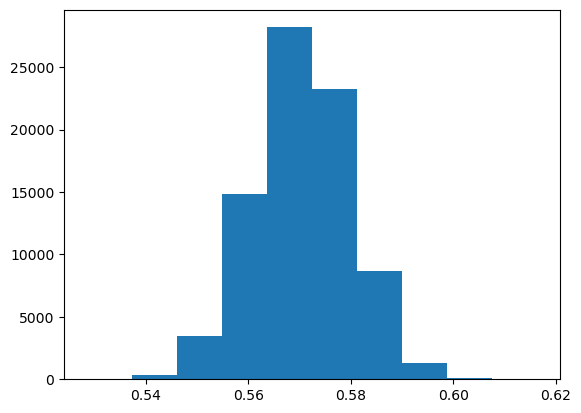

In [317]:
arrdog = np.random.normal(loc=dogs_mean, scale=standard_deviation, size=(len(intake)))
plt.hist(arrdog)

CAT'S DISTRIBUTION

In [318]:
total_cats = len(intake[intake['animal_type']=='Cat'])
cat_mean = total_cats / len(intake)

0.36987292204472044

In [319]:
cats_lot01_mean = len(lot01[lot01['animal_type']=='Cat']) / len(lot01)
cats_lot02_mean = len(lot02[lot02['animal_type']=='Cat']) / len(lot02)
cats_lot03_mean = len(lot03[lot03['animal_type']=='Cat']) / len(lot03)
cats_lot04_mean = len(lot04[lot04['animal_type']=='Cat']) / len(lot04)
cats_lot05_mean = len(lot05[lot05['animal_type']=='Cat']) / len(lot05)
cats_lot06_mean = len(lot06[lot06['animal_type']=='Cat']) / len(lot06)
cats_lot07_mean = len(lot07[lot07['animal_type']=='Cat']) / len(lot07)
cats_lot08_mean = len(lot08[lot08['animal_type']=='Cat']) / len(lot08)
cats_lot09_mean = len(lot09[lot09['animal_type']=='Cat']) / len(lot09)
cats_lot10_mean = len(lot10[lot10['animal_type']=='Cat']) / len(lot10)
cats_lot11_mean = len(lot11[lot11['animal_type']=='Cat']) / len(lot11)
cats_lot12_mean = len(lot12[lot12['animal_type']=='Cat']) / len(lot12)
cats_lot13_mean = len(lot13[lot13['animal_type']=='Cat']) / len(lot13)
cats_lot14_mean = len(lot14[lot14['animal_type']=='Cat']) / len(lot14)
cats_lot15_mean = len(lot15[lot15['animal_type']=='Cat']) / len(lot15)
cats_lot16_mean = len(lot16[lot16['animal_type']=='Cat']) / len(lot16)
cats_lot17_mean = len(lot17[lot17['animal_type']=='Cat']) / len(lot17)
cats_lot18_mean = len(lot18[lot18['animal_type']=='Cat']) / len(lot18)
cats_lot19_mean = len(lot19[lot19['animal_type']=='Cat']) / len(lot19)
cats_lot20_mean = len(lot20[lot20['animal_type']=='Cat']) / len(lot20)
cats_lots_means = [cats_lot01_mean, cats_lot02_mean, cats_lot03_mean, cats_lot04_mean, cats_lot05_mean, cats_lot06_mean,
                   cats_lot07_mean, cats_lot08_mean, cats_lot09_mean, cats_lot10_mean, cats_lot11_mean, cats_lot12_mean,
                   cats_lot13_mean, cats_lot14_mean, cats_lot15_mean, cats_lot16_mean, cats_lot17_mean, cats_lot18_mean,
                   cats_lot19_mean, cats_lot20_mean]

[0.36717385881766024,
 0.372162634073335,
 0.37665253180344227,
 0.3696682464454976,
 0.3744075829383886,
 0.3714143177849838,
 0.3751558992267398,
 0.38463457221252184,
 0.3497131454227987,
 0.3676727363432277,
 0.3791469194312796,
 0.3788974806684959,
 0.3711648790222,
 0.3726615115989025,
 0.3611873285108506,
 0.3719131953105513,
 0.35819406335744575,
 0.37789972561736096,
 0.36642554252930903,
 0.35195809428785235]

In [321]:
var_list_cats = []
for pm in cats_lots_means:
    delta = (pm - cat_mean)**2
    var_list_cats.append(delta)
var_array_cats = np.sum(var_list_cats)*ponderation
standard_deviation_cats = np.sqrt(var_array)
standard_deviation_cats

0.009386299886242162

(array([1.9000e+01, 5.4300e+02, 4.6360e+03, 1.8030e+04, 2.9155e+04,
        2.0739e+04, 6.1900e+03, 8.1800e+02, 5.5000e+01, 2.0000e+00]),
 array([0.32881927, 0.33776799, 0.34671672, 0.35566544, 0.36461416,
        0.37356288, 0.38251161, 0.39146033, 0.40040905, 0.40935777,
        0.4183065 ]),
 <BarContainer object of 10 artists>)

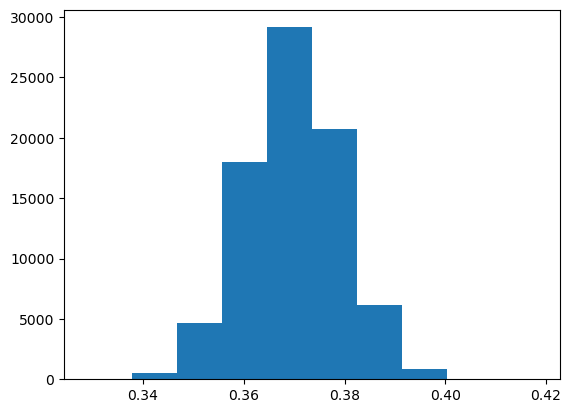

In [322]:
arrcat = np.random.normal(loc=cat_mean, scale=standard_deviation_cats, size=(len(intake)))
plt.hist(arrcat)

BIRD'S DISTRIBUTION

In [323]:
total_birds = len(intake[intake['animal_type']=='Bird'])
bird_mean = total_birds / len(intake)

In [326]:
birds_lot01_mean = len(lot01[lot01['animal_type']=='Bird']) / len(lot01)
birds_lot02_mean = len(lot02[lot02['animal_type']=='Bird']) / len(lot02)
birds_lot03_mean = len(lot03[lot03['animal_type']=='Bird']) / len(lot03)
birds_lot04_mean = len(lot04[lot04['animal_type']=='Bird']) / len(lot04)
birds_lot05_mean = len(lot05[lot05['animal_type']=='Bird']) / len(lot05)
birds_lot06_mean = len(lot06[lot06['animal_type']=='Bird']) / len(lot06)
birds_lot07_mean = len(lot07[lot07['animal_type']=='Bird']) / len(lot07)
birds_lot08_mean = len(lot08[lot08['animal_type']=='Bird']) / len(lot08)
birds_lot09_mean = len(lot09[lot09['animal_type']=='Bird']) / len(lot09)
birds_lot10_mean = len(lot10[lot10['animal_type']=='Bird']) / len(lot10)
birds_lot11_mean = len(lot11[lot11['animal_type']=='Bird']) / len(lot11)
birds_lot12_mean = len(lot12[lot12['animal_type']=='Bird']) / len(lot12)
birds_lot13_mean = len(lot13[lot13['animal_type']=='Bird']) / len(lot13)
birds_lot14_mean = len(lot14[lot14['animal_type']=='Bird']) / len(lot14)
birds_lot15_mean = len(lot15[lot15['animal_type']=='Bird']) / len(lot15)
birds_lot16_mean = len(lot16[lot16['animal_type']=='Bird']) / len(lot16)
birds_lot17_mean = len(lot17[lot17['animal_type']=='Bird']) / len(lot17)
birds_lot18_mean = len(lot18[lot18['animal_type']=='Bird']) / len(lot18)
birds_lot19_mean = len(lot19[lot19['animal_type']=='Bird']) / len(lot19)
birds_lot20_mean = len(lot20[lot20['animal_type']=='Bird']) / len(lot20)
birds_lots_means = [birds_lot01_mean, birds_lot02_mean, birds_lot03_mean, birds_lot04_mean, birds_lot05_mean, birds_lot06_mean, birds_lot07_mean, birds_lot08_mean, birds_lot09_mean, birds_lot10_mean, birds_lot11_mean, birds_lot12_mean,birds_lot13_mean, birds_lot14_mean, birds_lot15_mean, birds_lot16_mean, birds_lot17_mean, birds_lot18_mean, birds_lot19_mean, birds_lot20_mean]

[0.005986530306809678,
 0.002494387627837366,
 0.004739336492890996,
 0.0037415814417560487,
 0.002993265153404839,
 0.002993265153404839,
 0.004240458967323522,
 0.0032427039161885755,
 0.005238214018458469,
 0.0032427039161885755,
 0.004240458967323522,
 0.004240458967323522,
 0.003492142678972312,
 0.004489897730107259,
 0.007233724120728361,
 0.006485407832377151,
 0.004240458967323522,
 0.004489897730107259,
 0.0027438263906211027,
 0.004739336492890996]

In [327]:
var_list_birds = []
for pm in birds_lots_means:
    delta = (pm - bird_mean)**2
    var_list_birds.append(delta)
var_array_birds = np.sum(var_list_birds)*ponderation
standard_deviation_birds = np.sqrt(var_array)

0.009386299886242162

(array([   33.,   474.,  3316., 12757., 23952., 23916., 12245.,  3048.,
          418.,    28.]),
 array([-0.0350445 , -0.02714656, -0.01924861, -0.01135067, -0.00345272,
         0.00444522,  0.01234317,  0.02024111,  0.02813906,  0.03603701,
         0.04393495]),
 <BarContainer object of 10 artists>)

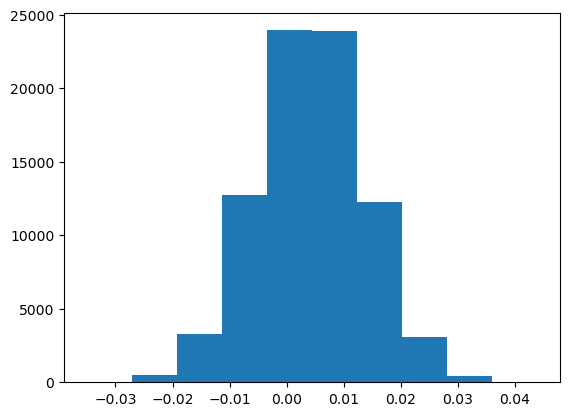

In [328]:
arrbird = np.random.normal(loc=bird_mean, scale=standard_deviation_birds, size=(len(intake)))
plt.hist(arrbird)

LIVESTOCK'S DISTRIBUTION

In [329]:
total_livestock = len(intake[intake['animal_type']=='Livestock'])
livestock_mean = total_livestock / len(intake)

In [332]:
livestock_lot01_mean = len(lot01[lot01['animal_type'] == 'Livestock']) / len(lot01)
livestock_lot02_mean = len(lot02[lot02['animal_type'] == 'Livestock']) / len(lot02)
livestock_lot03_mean = len(lot03[lot03['animal_type'] == 'Livestock']) / len(lot03)
livestock_lot04_mean = len(lot04[lot04['animal_type'] == 'Livestock']) / len(lot04)
livestock_lot05_mean = len(lot05[lot05['animal_type'] == 'Livestock']) / len(lot05)
livestock_lot06_mean = len(lot06[lot06['animal_type'] == 'Livestock']) / len(lot06)
livestock_lot07_mean = len(lot07[lot07['animal_type'] == 'Livestock']) / len(lot07)
livestock_lot08_mean = len(lot08[lot08['animal_type'] == 'Livestock']) / len(lot08)
livestock_lot09_mean = len(lot09[lot09['animal_type'] == 'Livestock']) / len(lot09)
livestock_lot10_mean = len(lot10[lot10['animal_type'] == 'Livestock']) / len(lot10)
livestock_lot11_mean = len(lot11[lot11['animal_type'] == 'Livestock']) / len(lot11)
livestock_lot12_mean = len(lot12[lot12['animal_type'] == 'Livestock']) / len(lot12)
livestock_lot13_mean = len(lot13[lot13['animal_type'] == 'Livestock']) / len(lot13)
livestock_lot14_mean = len(lot14[lot14['animal_type'] == 'Livestock']) / len(lot14)
livestock_lot15_mean = len(lot15[lot15['animal_type'] == 'Livestock']) / len(lot15)
livestock_lot16_mean = len(lot16[lot16['animal_type'] == 'Livestock']) / len(lot16)
livestock_lot17_mean = len(lot17[lot17['animal_type'] == 'Livestock']) / len(lot17)
livestock_lot18_mean = len(lot18[lot18['animal_type'] == 'Livestock']) / len(lot18)
livestock_lot19_mean = len(lot19[lot19['animal_type'] == 'Livestock']) / len(lot19)
livestock_lot20_mean = len(lot20[lot20['animal_type'] == 'Livestock']) / len(lot20)
livestock_lots_means = [livestock_lot01_mean, livestock_lot02_mean, livestock_lot03_mean, livestock_lot04_mean, livestock_lot05_mean,livestock_lot06_mean, livestock_lot07_mean, livestock_lot08_mean, livestock_lot09_mean, livestock_lot10_mean,livestock_lot11_mean, livestock_lot12_mean, livestock_lot13_mean, livestock_lot14_mean, livestock_lot15_mean,livestock_lot16_mean, livestock_lot17_mean, livestock_lot18_mean, livestock_lot19_mean, livestock_lot20_mean]
livestock_lots_means

[0.0,
 0.0,
 0.0004988775255674732,
 0.0,
 0.0,
 0.0002494387627837366,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0002494387627837366,
 0.0002494387627837366,
 0.0,
 0.0007483162883512097,
 0.0002494387627837366,
 0.0,
 0.0,
 0.0]

In [333]:
var_list_livestock = []
for pm in livestock_lots_means:
    delta = (pm - livestock_mean)**2
    var_list_livestock.append(delta)
var_array_livestock = np.sum(var_list_livestock)*ponderation
standard_deviation_livestock = np.sqrt(var_array_livestock)
standard_deviation_livestock

0.00020071684907219556

(array([1.9000e+01, 2.7600e+02, 2.4270e+03, 1.0924e+04, 2.3113e+04,
        2.5364e+04, 1.3973e+04, 3.5860e+03, 4.7900e+02, 2.6000e+01]),
 array([-7.71592025e-04, -5.99180225e-04, -4.26768425e-04, -2.54356625e-04,
        -8.19448251e-05,  9.04669749e-05,  2.62878775e-04,  4.35290575e-04,
         6.07702375e-04,  7.80114175e-04,  9.52525975e-04]),
 <BarContainer object of 10 artists>)

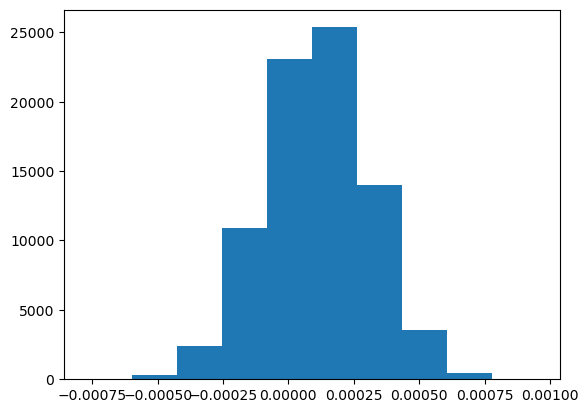

In [334]:
arrlivestock = np.random.normal(loc=livestock_mean, scale=standard_deviation_livestock, size=(len(intake)))
plt.hist(arrlivestock)

NOT DEFINED ANIMALS DISTRIBUTION

In [335]:
total_other = len(intake[intake['animal_type']=='Other'])
other_mean = total_other / len(intake)

In [336]:
other_lot01_mean = len(lot01[lot01['animal_type'] == 'Other']) / len(lot01)
other_lot02_mean = len(lot02[lot02['animal_type'] == 'Other']) / len(lot02)
other_lot03_mean = len(lot03[lot03['animal_type'] == 'Other']) / len(lot03)
other_lot04_mean = len(lot04[lot04['animal_type'] == 'Other']) / len(lot04)
other_lot05_mean = len(lot05[lot05['animal_type'] == 'Other']) / len(lot05)
other_lot06_mean = len(lot06[lot06['animal_type'] == 'Other']) / len(lot06)
other_lot07_mean = len(lot07[lot07['animal_type'] == 'Other']) / len(lot07)
other_lot08_mean = len(lot08[lot08['animal_type'] == 'Other']) / len(lot08)
other_lot09_mean = len(lot09[lot09['animal_type'] == 'Other']) / len(lot09)
other_lot10_mean = len(lot10[lot10['animal_type'] == 'Other']) / len(lot10)
other_lot11_mean = len(lot11[lot11['animal_type'] == 'Other']) / len(lot11)
other_lot12_mean = len(lot12[lot12['animal_type'] == 'Other']) / len(lot12)
other_lot13_mean = len(lot13[lot13['animal_type'] == 'Other']) / len(lot13)
other_lot14_mean = len(lot14[lot14['animal_type'] == 'Other']) / len(lot14)
other_lot15_mean = len(lot15[lot15['animal_type'] == 'Other']) / len(lot15)
other_lot16_mean = len(lot16[lot16['animal_type'] == 'Other']) / len(lot16)
other_lot17_mean = len(lot17[lot17['animal_type'] == 'Other']) / len(lot17)
other_lot18_mean = len(lot18[lot18['animal_type'] == 'Other']) / len(lot18)
other_lot19_mean = len(lot19[lot19['animal_type'] == 'Other']) / len(lot19)
other_lot20_mean = len(lot20[lot20['animal_type'] == 'Other']) / len(lot20)
other_lots_means = [other_lot01_mean, other_lot02_mean, other_lot03_mean, other_lot04_mean, other_lot05_mean,other_lot06_mean, other_lot07_mean, other_lot08_mean, other_lot09_mean, other_lot10_mean, other_lot11_mean, other_lot12_mean, other_lot13_mean, other_lot14_mean, other_lot15_mean, other_lot16_mean, other_lot17_mean, other_lot18_mean, other_lot19_mean, other_lot20_mean]
other_lots_means

[0.055874282863556994,
 0.05412821152407084,
 0.05986530306809678,
 0.0538787727612871,
 0.057370915440259414,
 0.06036418059366425,
 0.05238214018458468,
 0.05337989523571963,
 0.04938887503117984,
 0.060114741830880516,
 0.05337989523571963,
 0.055125966575205784,
 0.050636068845098525,
 0.05712147667747568,
 0.05462708904963831,
 0.05712147667747568,
 0.051134946370666,
 0.05487652781242205,
 0.05537540533798952,
 0.05936642554252931]

In [337]:
var_list_other = []
for pm in other_lots_means:
    delta = (pm - other_mean)**2
    var_list_other.append(delta)
var_array_other = np.sum(var_list_other)*ponderation
standard_deviation_other = np.sqrt(var_array_other)
standard_deviation_other

0.0030939105932320486

(array([1.4000e+01, 3.3400e+02, 3.0250e+03, 1.2334e+04, 2.4831e+04,
        2.4341e+04, 1.2084e+04, 2.8740e+03, 3.2500e+02, 2.5000e+01]),
 array([0.04183854, 0.04453666, 0.04723478, 0.0499329 , 0.05263102,
        0.05532914, 0.05802727, 0.06072539, 0.06342351, 0.06612163,
        0.06881975]),
 <BarContainer object of 10 artists>)

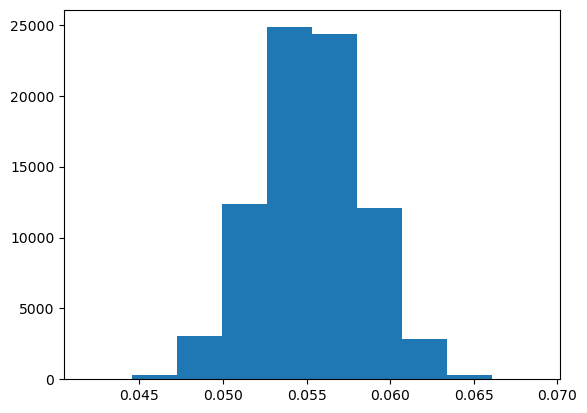

In [338]:
arrother = np.random.normal(loc=other_mean, scale=standard_deviation_other, size=(len(intake)))
plt.hist(arrother)

QUESTION 05: What are the adoption rates for specific breeds?

In [369]:
top_breeds = intake['breed'].value_counts().head(5)
top_breeds

Domestic Shorthair Mix      23519
Pit Bull Mix                 6382
Chihuahua Shorthair Mix      4860
Labrador Retriever Mix       4841
Domestic Medium Hair Mix     2337
Name: breed, dtype: int64

In [386]:
Domestic_Shorthair_Mix_Ratio = len(intake[intake['breed']=='Domestic Shorthair Mix']) / len(intake['breed'])
Domestic_Shorthair_Mix_Ratio

0.29330190679287166

In [389]:
Pit_Bull_Mix_Ratio = len(intake[intake['breed']=='Pit Bull Mix']) / len(intake['breed'])
Pit_Bull_Mix_Ratio

0.07958896080412037

In [390]:
Chihuahua_Shorthair_Mix_Ratio = len(intake[intake['breed']=='Chihuahua Shorthair Mix']) / len(intake['breed'])
Chihuahua_Shorthair_Mix_Ratio

0.060608328033222345

In [391]:
Labrador_Retriever_Mix_Ratio = len(intake[intake['breed']=='Labrador Retriever Mix']) / len(intake['breed'])
Labrador_Retriever_Mix_Ratio

0.06037138189482086

In [392]:
Domestic_Medium_Hair_Mix_Ratio = len(intake[intake['breed']=='Domestic Medium Hair Mix']) / len(intake['breed'])
Domestic_Medium_Hair_Mix_Ratio

0.02914437502338284

What are the adoption rates for different colorings?

In [395]:
top_colorings = intake['color'].value_counts().head(5)
top_colorings

Black/White    8340
Black          6710
Brown Tabby    4487
Brown          3618
White          2849
Name: color, dtype: int64

In [399]:
Black_White_Ratio = len(intake[intake['color']=='Black/White']) / len(intake['color'])
Black_Ratio = len(intake[intake['color']=='Black']) / len(intake['color'])
Brown_Tabby_Ratio = len(intake[intake['color']=='Brown Tabby']) / len(intake['color'])
Brown_Ratio = len(intake[intake['color']=='Brown']) / len(intake['color'])
White_Ratio = len(intake[intake['color']=='White']) / len(intake['color'])
Black_White_Ratio, Black_Ratio, Brown_Tabby_Ratio, Brown_Ratio, White_Ratio

(0.10400688390886303,
 0.08367939940389339,
 0.055956701210919474,
 0.04511953309139886,
 0.03552944991083343)

QUESTION 07: About how many animals are spayed_neutered each month?

In [533]:
sex = intake['sex_upon_intake'].value_counts()
sex

Intact Male      25488
Intact Female    23860
Neutered Male    12794
Spayed Female    11231
Unknown           6813
Name: sex_upon_intake, dtype: int64

I will consider the Neutered Male and Spayed Female divided by the total of months

In [515]:
new = intake.sort_values(by='datetime').tail(1)['datetime']
old = intake.sort_values(by='datetime').head(1)['datetime']
timedif = new.array - old.array
timedif[0]

Timedelta('1640 days 10:41:00')

In [514]:
s = pd.Series([new.array,old.array])
s.diff()

0                       NaN
1    [-1641 days +13:19:00]
dtype: object

In [536]:
months = 1640/30
totalmonths = months.__round__()

In [538]:
neutered = sex.array[2]
spayed = sex.array[3]
totalneutered = neutered + spayed
animal_spayed_month = totalneutered/totalmonths
animal_spayed_month.__round__()

437